# Model Population Notebook

This notebook covers:
- The creation of uniform population input files
- An example of how to run a simulation, summarise the results, and plot them
- Example results demonstrating the different simulations that can be run and some simple comparisons.

We begin by importing the necessary modules.

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

import pyEpiabm as pe

<frozen importlib._bootstrap>:241: RuntimeWarning: pandas._libs.hashtable.UInt64HashTable size changed, may indicate binary incompatibility. Expected 32 from C header, got 48 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: pandas._libs.hashtable.Int64HashTable size changed, may indicate binary incompatibility. Expected 32 from C header, got 48 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: pandas._libs.hashtable.UInt32HashTable size changed, may indicate binary incompatibility. Expected 32 from C header, got 48 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: pandas._libs.hashtable.Int32HashTable size changed, may indicate binary incompatibility. Expected 32 from C header, got 48 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: pandas._libs.hashtable.UInt16HashTable size changed, may indicate binary incompatibility. Expected 32 from C header, got 48 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: pandas

For this example, we will create an 8x8 grid, consisting of 64 cells, and uniformly distribute a population of 10,000 people across the grid.

In [4]:
cell_grid = 8 # dimensions of grid

cell = []
microcell = []
location_x = []
location_y = []
household = []
place = []
susceptible = []

total_population = 10000
microcell_per_cell_grid = 3 # arranges microcells in a 3x3 grid within each cell

total_cells = cell_grid * cell_grid
microcells_per_cell = microcell_per_cell_grid * microcell_per_cell_grid
total_microcells = total_cells * microcells_per_cell

population_per_cell = total_population / total_cells
population_per_microcell = population_per_cell / microcells_per_cell

household_per_microcell = population_per_microcell / 5
place_per_microcell = 5

household = [int(household_per_microcell)] * total_microcells
place = [place_per_microcell] * total_microcells
susceptible = [int(population_per_microcell)] * total_microcells

for i in range(total_cells):
    for j in range(microcells_per_cell):
        cell.append(i)
        microcell.append(j)

for i in range(cell_grid):
    for j in range(cell_grid):
        for k in range(microcell_per_cell_grid):
            for l in range(microcell_per_cell_grid):
                x = i
                y = j
                location_x.append(x)
                location_y.append(y)

new_susceptible = susceptible[:-(total_population - sum(susceptible))]+[x + 1 for x in susceptible[-(total_population - sum(susceptible)):]]

df = pd.DataFrame(list(zip(cell, microcell, location_x, location_y, household, place, new_susceptible)),
               columns =['cell', 'microcell', 'location_x', 'location_y', 'household_number', 'place_number', 'Susceptible'])

df.to_csv("input_8x8.csv", index = False)  

We run five repeat simulations for the example population, saving the output of each for subseqent processing.
All simulations begin with 10 infected individuals and are run for 150 days.

In [5]:
# load in parameter file
pe.Parameters.set_file(os.path.join(os.path.abspath(''),
                                    "noInt_params.json"))

# load in the population configuration file
file_loc = "input_8x8.csv"
output_file = "output_8x8_rep{}"

number_repetitions = 5

# we run the simulation for 5 repetitions by changing the seed 
for i in range(number_repetitions):
    print("Set seed to:", i)
    set_seed = i
    population = pe.routine.FilePopulationFactory.make_pop(file_loc,
                                                        random_seed=i)

    # sim_ and file_params give details for the running of the simulations
    # and where output should be written to.
    sim_params = {"simulation_start_time": 0, "simulation_end_time":150,
                "initial_infected_number": 10,
                "initial_infect_cell": True,
                "simulation_seed": i}

    # we save each repetition to a separate dataframe
    file_params = {"output_file": output_file.format(i),
                "output_dir": os.path.join(os.path.abspath(''),
                                            "simulation_outputs"),
                "spatial_output": True,
                "age_stratified": False}

    # Create a simulation object, configure it with the parameters given,
    # then run the simulation.
    sim = pe.routine.Simulation()
    sim.configure(
        population,
        [pe.sweep.InitialHouseholdSweep(),
            pe.sweep.InitialInfectedSweep(),
            pe.sweep.InitialisePlaceSweep()],
        [
            pe.sweep.UpdatePlaceSweep(),
            pe.sweep.HouseholdSweep(),
            pe.sweep.PlaceSweep(),
            pe.sweep.SpatialSweep(),
            pe.sweep.QueueSweep(),
            pe.sweep.HostProgressionSweep(),
        ],
        sim_params,
        file_params,
    )
    sim.run_sweeps()

    # Need to close the writer object at the end of each simulation.
    del (sim.writer)
    del (sim)


Set seed to: 0


/Users/laraherriott/Documents/Oxford/Epidemiology/NewEpiabm/epiabm/pyEpiabm/pyEpiabm/sweep/transition_matrices.py:143: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.matrix = self.matrix.applymap(
/Users/laraherriott/Documents/Oxford/Epidemiology/NewEpiabm/epiabm/pyEpiabm/pyEpiabm/sweep/transition_matrices.py:143: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.matrix = self.matrix.applymap(
/Users/laraherriott/Documents/Oxford/Epidemiology/NewEpiabm/epiabm/pyEpiabm/pyEpiabm/sweep/transition_matrices.py:143: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.matrix = self.matrix.applymap(
/Users/laraherriott/Documents/Oxford/Epidemiology/NewEpiabm/epiabm/pyEpiabm/pyEpiabm/sweep/transition_matrices.py:143: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.matrix = self.matrix.applymap(
/Users/laraherriott/Documents/Oxford/Epidemi

Set seed to: 1


/Users/laraherriott/Documents/Oxford/Epidemiology/NewEpiabm/epiabm/pyEpiabm/pyEpiabm/sweep/transition_matrices.py:143: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.matrix = self.matrix.applymap(
/Users/laraherriott/Documents/Oxford/Epidemiology/NewEpiabm/epiabm/pyEpiabm/pyEpiabm/sweep/transition_matrices.py:143: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.matrix = self.matrix.applymap(
/Users/laraherriott/Documents/Oxford/Epidemiology/NewEpiabm/epiabm/pyEpiabm/pyEpiabm/sweep/transition_matrices.py:143: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.matrix = self.matrix.applymap(
/Users/laraherriott/Documents/Oxford/Epidemiology/NewEpiabm/epiabm/pyEpiabm/pyEpiabm/sweep/transition_matrices.py:143: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.matrix = self.matrix.applymap(
/Users/laraherriott/Documents/Oxford/Epidemi

Set seed to: 2


100%|██████████| 150/150 [00:49<00:00,  3.00it/s]
/Users/laraherriott/Documents/Oxford/Epidemiology/NewEpiabm/epiabm/pyEpiabm/pyEpiabm/sweep/transition_matrices.py:143: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.matrix = self.matrix.applymap(
/Users/laraherriott/Documents/Oxford/Epidemiology/NewEpiabm/epiabm/pyEpiabm/pyEpiabm/sweep/transition_matrices.py:143: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.matrix = self.matrix.applymap(
/Users/laraherriott/Documents/Oxford/Epidemiology/NewEpiabm/epiabm/pyEpiabm/pyEpiabm/sweep/transition_matrices.py:143: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.matrix = self.matrix.applymap(
/Users/laraherriott/Documents/Oxford/Epidemiology/NewEpiabm/epiabm/pyEpiabm/pyEpiabm/sweep/transition_matrices.py:143: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.matrix = self.matrix.appl

Set seed to: 3


100%|██████████| 150/150 [00:45<00:00,  3.27it/s]
/Users/laraherriott/Documents/Oxford/Epidemiology/NewEpiabm/epiabm/pyEpiabm/pyEpiabm/sweep/transition_matrices.py:143: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.matrix = self.matrix.applymap(


Set seed to: 4


/Users/laraherriott/Documents/Oxford/Epidemiology/NewEpiabm/epiabm/pyEpiabm/pyEpiabm/sweep/transition_matrices.py:143: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.matrix = self.matrix.applymap(
/Users/laraherriott/Documents/Oxford/Epidemiology/NewEpiabm/epiabm/pyEpiabm/pyEpiabm/sweep/transition_matrices.py:143: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.matrix = self.matrix.applymap(
/Users/laraherriott/Documents/Oxford/Epidemiology/NewEpiabm/epiabm/pyEpiabm/pyEpiabm/sweep/transition_matrices.py:143: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.matrix = self.matrix.applymap(
/Users/laraherriott/Documents/Oxford/Epidemiology/NewEpiabm/epiabm/pyEpiabm/pyEpiabm/sweep/transition_matrices.py:143: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.matrix = self.matrix.applymap(
/Users/laraherriott/Documents/Oxford/Epidemi

We then calculate the mean and standard deviation across the repetitions.

In [6]:
combined_df = pd.DataFrame()
summary_df = pd.DataFrame()

count = 0
for i in range(number_repetitions):
    file = "output_8x8_rep{}".format(i)
    filename = os.path.join(os.path.abspath(''), "simulation_outputs",
                            file)
    SIRdf = pd.read_csv(filename)
    os.remove(filename)
    total = SIRdf[list(SIRdf.filter(regex='InfectionStatus.Infect'))]
    SIRdf["Infected"] = total.sum(axis=1)
    SIRdf = SIRdf.groupby(["time"]).agg(
                                    {"InfectionStatus.Susceptible": 'sum',
                                    "Infected": 'sum',
                                    "InfectionStatus.Recovered": 'sum',
                                    "InfectionStatus.Dead": 'sum'})
    SIRdf.rename(columns={"InfectionStatus.Susceptible": "Susceptible_{}".format(count),
                        "InfectionStatus.Recovered": "Recovered_{}".format(count),
                        "Infected": "Infected_{}".format(count)},
                inplace=True)
    combined_df["Susceptible_{}".format(count)] = SIRdf["Susceptible_{}".format(count)]
    combined_df["Recovered_{}".format(count)] = SIRdf["Recovered_{}".format(count)]
    combined_df["Infected_{}".format(count)] = SIRdf["Infected_{}".format(count)]
    count += 1

all_infections = combined_df[list(combined_df.filter(regex='Infected'))]
all_susceptible = combined_df[list((combined_df.filter(regex='Susceptible')))]
all_recovered = combined_df[list((combined_df.filter(regex='Recovered')))]

summary_df["av_infections"] = all_infections.mean(axis=1)
summary_df["sd_infections"] = all_infections.std(axis=1)
summary_df["av_susceptible"] = all_susceptible.mean(axis=1)
summary_df["sd_susceptible"] = all_susceptible.std(axis=1)
summary_df["av_recovered"] = all_recovered.mean(axis=1)
summary_df["sd_recovered"] = all_recovered.std(axis=1)



time_list = []
for i in range(len(summary_df["av_infections"])):
    time_list.append(i)

summary_df["time"] = time_list

Finally, we plot the infection curve along with the standard deviations.

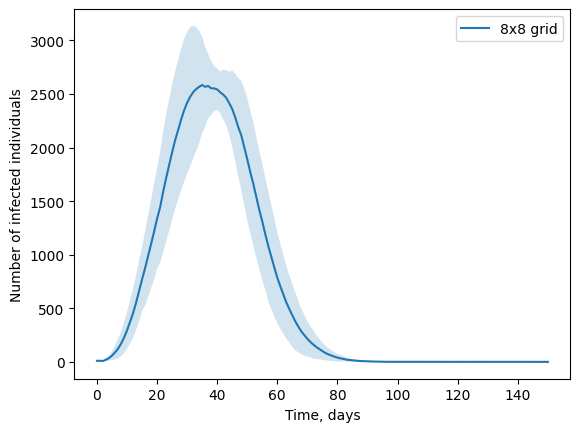

In [7]:
plt.figure()

plt.plot(summary_df['time'], summary_df['av_infections'], label=('8x8 grid'))
plt.legend()
plt.fill_between(summary_df['time'], 
                 summary_df['av_infections'] - summary_df['sd_infections'], 
                 summary_df['av_infections'] + summary_df['sd_infections'], 
                 alpha=0.2)
plt.xlabel('Time, days')
plt.ylabel('Number of infected individuals')
plt.show()

Below, we show some example results comparing the infection curves for different grid sizes (and thus different population density) with various interventions.

We first compare the infection curves for different grid sizes ranging from 15x15 to 4x4.

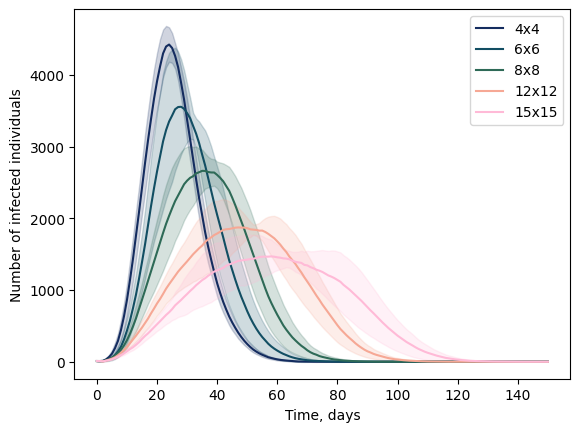

In [10]:
file_name = "simulation_outputs/combined_summary.csv"

combined_df = pd.read_csv(file_name)
plt.figure()

grid_list = [4, 6, 8, 12, 15]
colour_list = ['#142C5F', '#124E63', '#2E6A57', '#F6A895', '#FFBAD7']

count = 0
for element in grid_list:

    plt.plot(combined_df['time'], combined_df['av_infections_{}'.format(element)], color = colour_list[count], label=(str(element)+'x'+str(element)))
    plt.legend()
    plt.fill_between(combined_df['time'], 
                    combined_df['av_infections_{}'.format(element)] - combined_df['sd_infections_{}'.format(element)], 
                    combined_df['av_infections_{}'.format(element)] + combined_df['sd_infections_{}'.format(element)], 
                    color=colour_list[count], alpha=0.2)

    count += 1
plt.xlabel('Time, days')
plt.ylabel('Number of infected individuals')
plt.show()